<a href="https://colab.research.google.com/github/toryn13/Teaching-metagenomics-in-Colab/blob/main/Rintro_Bioc0003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioc0003 applied statistics for Biochemisrty

1. Setting up the notebook

Copy the files from this folder, add the folder to your google drvie

https://drive.google.com/drive/folders/1ICTdJmi6CEORqaiYqbRtVOcC1kQnppHp?usp=sharing



IMPORTANT Right click coursework and select Add shortcut to drive. If the option appears make sure you add the file to MyDrive.


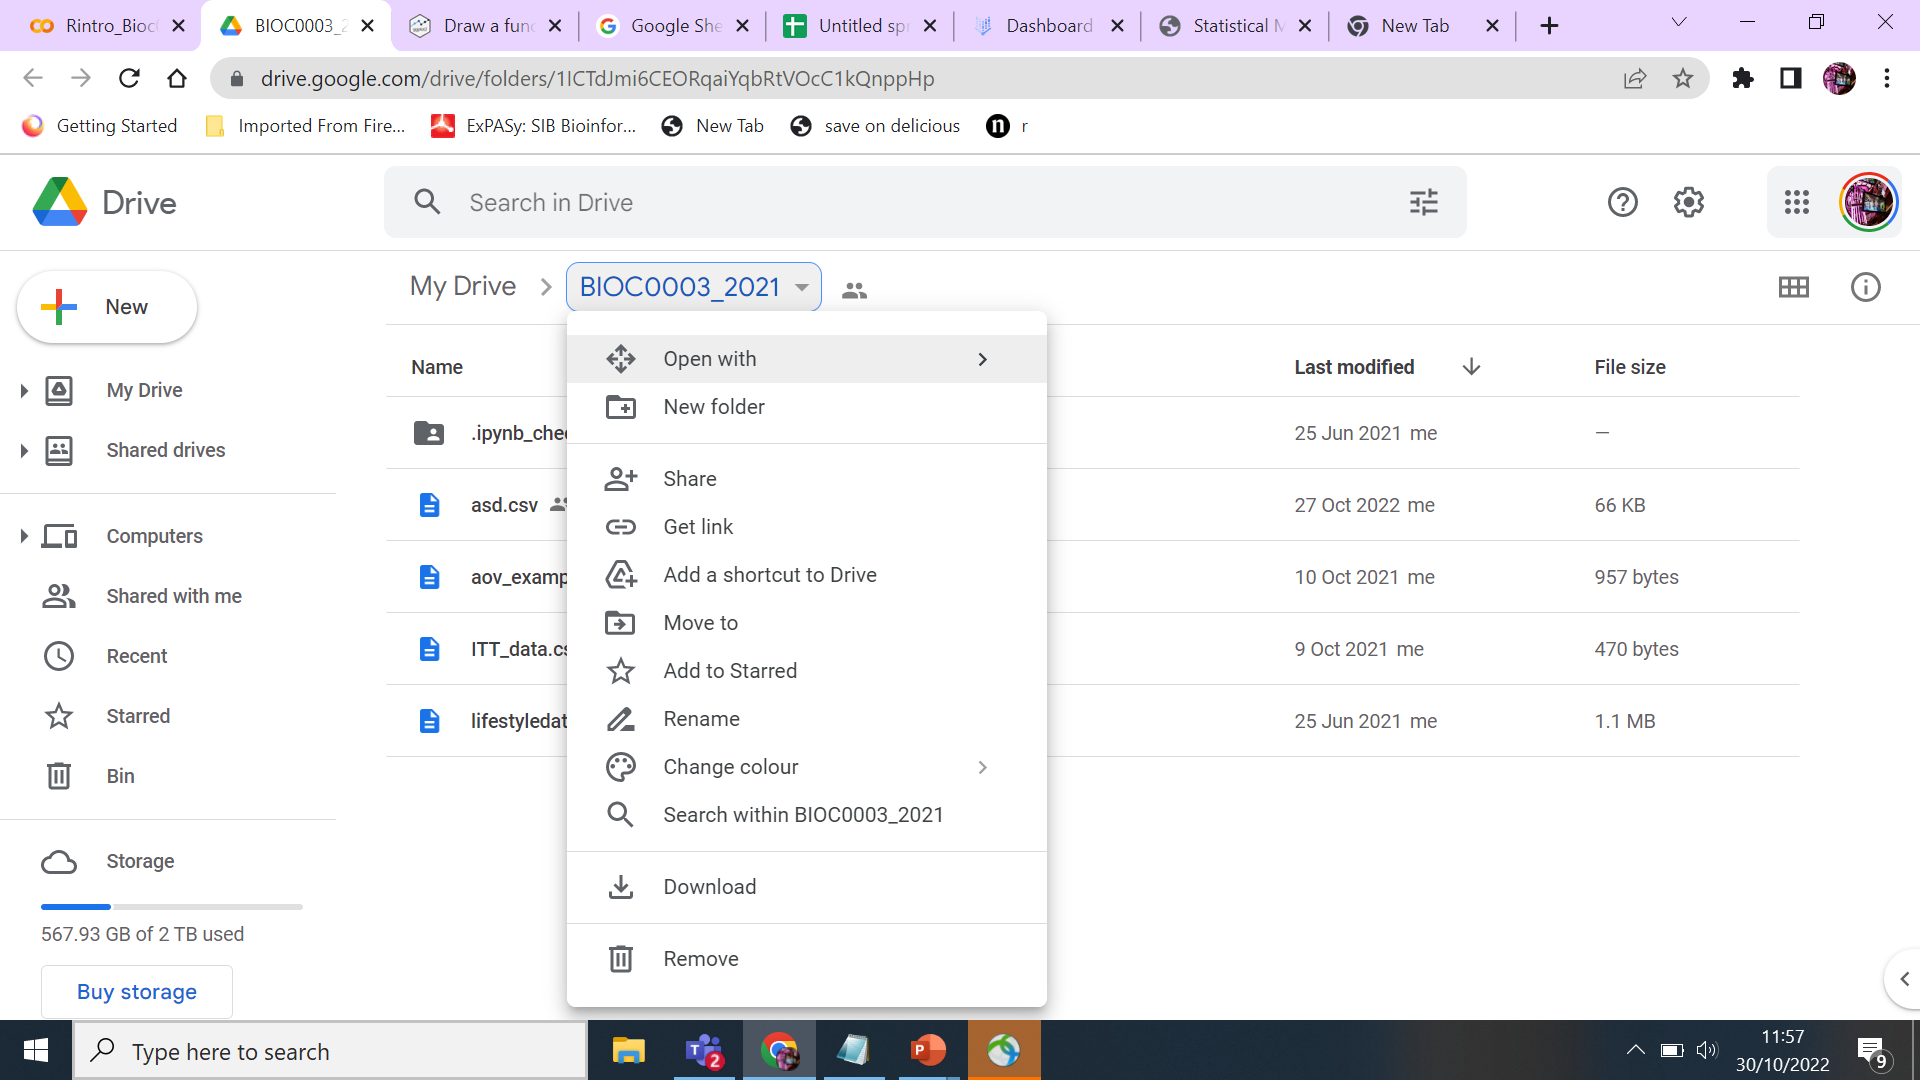

Google Colab is virtual Python environment, any code we enter, Colab thinks is Python. Colab is a virtual machine (VM) you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation mark. If you leave the notebook it will save any changes, but after a few hours all the files will be lost and you'll have to re-import them. It is import to run the cells in the correct order.

Although we are using python, we can use Colab with other languages (R, Julia, Bash, Perl). We use cell  magic %% for Bash and Perl. R and Julia need some preinstallation.

Add Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load R, to run R we need to have %%R in every code block

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.2 MB/s 
  Created wheel for rpy2: filename=rpy2-3.5.1-cp37-cp37m-linux_x86_64.whl size=310570 sha256=9b2987a9e3b7706a4dcc97c6dbb825628e468bb44fb0efe47ef726340f9a16cb
  Stored in directory: /root/.cache/pip/wheels/65/df/9e/39aa22a3f47ec58751b5bf6907036fbc131d85b6d7cbd3b3fe
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

Copy the files to colab

In [ ]:
%%R
# identify the folders
current_folder <- "/content/drive/MyDrive/BIOC0003_2022/"
new_folder <- "/content/"

# find the files that you want
files <- list.files(current_folder, ".csv$")
xl <- list.files(current_folder, ".xlsx$")

In [ ]:
%%R
file.copy(file.path(current_folder,files), new_folder)
file.copy(file.path(current_folder,xl), new_folder)

[1] TRUE


In [ ]:
%%R
install.packages("rstatix")

(as ‘lib’ is unspecified)















































































	‘/tmp/Rtmp4Ibxiw/downloaded_packages’



In [ ]:
%%R
library(tidyverse)



✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
%%R
library(rstatix)

Attaching package: ‘rstatix’



    filter




##Normal distribution

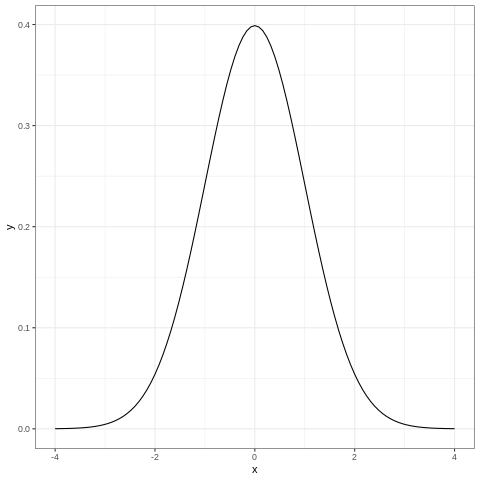

In [ ]:
%%R
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
        stat_function(fun = dnorm)+theme_bw()

# Glucose data

In [ ]:
%%R
itt<-read_csv("ITT_data.csv")
itt

Rows: 18 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Genotype
dbl (6): mouse, T0, T15, T30, T60, T90

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 18 × 7
   mouse Genotype    T0   T15   T30   T60   T90
   <dbl> <chr>    <dbl> <dbl> <dbl> <dbl> <dbl>
 1     1 +          8.5   6.4   5.2   5     7.8
 2     2 -          8     6     4.7   8.1   8.1
 3     3 +          8.3   5.4   3.5   3.7   4.9
 4     4 +          7.1   5.2   3.9   3.6   4.3
 5     5 +          7.3   5.8   5     5.8   7.8
 6     6 -         10.1   5.6   5.5   6.2   6.6
 7     7 +         10     5.9   5.4   4.6   6.5
 8     8 +          9.3   4.7   3.1   2.6  NA  
 9     9 -          8.3   6.2   4.9   3.9   5.2
10    10 -          6.7   5.9   6     6.3   7.4
11    11 +          7.8   7.2   4.9   4.6   6.2
12    12 +          7.7   4.2

In [ ]:
%%R
itt_l<-itt%>%pivot_longer(starts_with("T"), names_to = "Time", values_to = "Glucose")
itt_l

# A tibble: 90 × 4
   mouse Genotype Time  Glucose
   <dbl> <chr>    <chr>   <dbl>
 1     1 +        T0        8.5
 2     1 +        T15       6.4
 3     1 +        T30       5.2
 4     1 +        T60       5  
 5     1 +        T90       7.8
 6     2 -        T0        8  
 7     2 -        T15       6  
 8     2 -        T30       4.7
 9     2 -        T60       8.1
10     2 -        T90       8.1
# … with 80 more rows
# ℹ Use `print(n = ...)` to see more rows


## T Distrubution

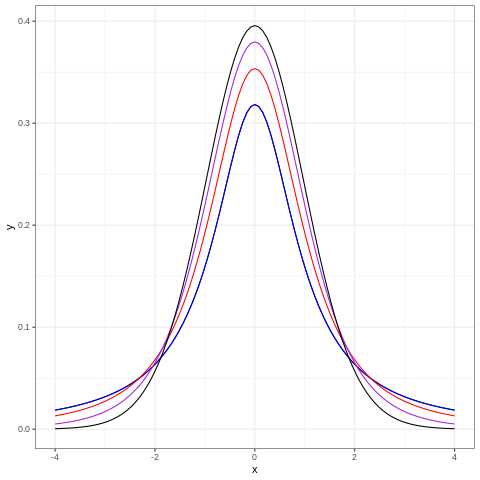

In [ ]:
%%R
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
        stat_function(fun = dt, args = list(df = 1))+stat_function(fun = dt, args = list(df = 1), color="blue")+stat_function(fun = dt, args = list(df = 2), color="red")+stat_function(fun = dt, args = list(df = 5), color="purple")+stat_function(fun = dt, args = list(df = 30))+theme_bw()

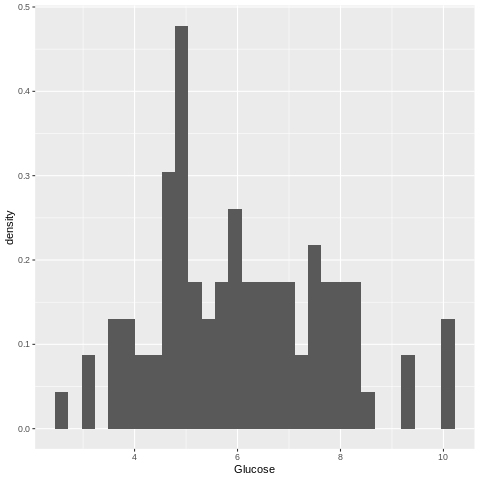

In [ ]:
%%R
itt_l%>%ggplot(aes(Glucose)) +   
  geom_histogram(aes(y = ..density..))
  

In [ ]:
%%R
mean_glu<-itt_l%>%group_by(Time, Genotype)%>%summarize(Ave=mean(Glucose),SD=sd(Glucose))

`summarise()` has grouped output by 'Time'. You can override using the
`.groups` argument.


#Summary statistics

In [ ]:
%%R
summary_itt<-itt_l%>%group_by(Time)%>%get_summary_stats(Glucose,type="full")
summary_itt

# A tibble: 5 × 14
  Time  variable     n   min   max median    q1    q3   iqr   mad  mean    sd
  <chr> <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 T0    Glucose     18   6.7  10.1   8.15  7.45  9.1   1.65  1.11  8.29 1.07 
2 T15   Glucose     18   4.2   7.4   5.85  4.97  6.15  1.18  0.89  5.73 0.923
3 T30   Glucose     18   3.1   7     5     4.25  5.48  1.23  0.89  4.96 1.01 
4 T60   Glucose     18   2.6   8.1   4.9   4.03  6.28  2.25  1.85  5.11 1.47 
5 T90   Glucose     17   4.3   8.4   6.5   5     7.8   2.8   1.93  6.37 1.39 
# … with 2 more variables: se <dbl>, ci <dbl>
# ℹ Use `colnames()` to see all variable names


In [ ]:
%%R
colnames(summary_itt)

 [1] "Time"     "variable" "n"        "min"      "max"      "median"  
 [7] "q1"       "q3"       "iqr"      "mad"      "mean"     "sd"      
[13] "se"       "ci"      


In [ ]:
%%R
summary_itt$ci

[1] 0.532 0.459 0.502 0.733 0.715


## Data from "Effect of a 2-hour interval between dinner and bedtime on glycated haemoglobin levels in middle-aged and elderly Japanese people: a longitudinal analysis of 3-year health check-up data"

https://nutrition.bmj.com/content/2/1/1

In [ ]:
%%R
lifedata<-read_csv("lifestyledata.csv")

Rows: 6156 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID of participants
dbl (66): Sex, Year of birth, Month of birth, Day of birth, Year of data, Ti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
colnames(lifedata)

 [1] "ID of participants"                     
 [2] "Sex"                                    
 [3] "Year of birth"                          
 [4] "Month of birth"                         
 [5] "Day of birth"                           
 [6] "Year of data"                           
 [7] "Time of data"                           
 [8] "Blood pressure_category"                
 [9] "Triglyceride-category"                  
[10] "HDL_category"                           
[11] "LDL_category"                           
[12] "GPT_category"                           
[13] "g-GTP_category"                         
[14] "HbA1c_category"                         
[15] "Age"                                    
[16] "Living area"                            
[17] "Height"                                 
[18] "Weight"                                 
[19] "Waist circumference (cm)"               
[20] "BMI"                                    
[21] "Fasting blood glucose"                  
[22] "HbA1c" 

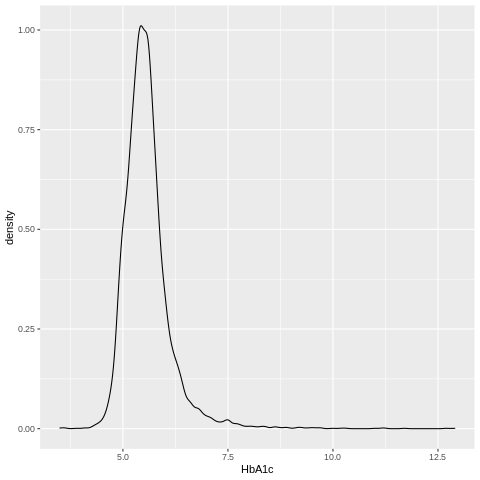

In [ ]:
%%R
lifedata%>%ggplot(aes(HbA1c))+geom_density()

In [ ]:
%%R
zHBA1c<-scale(lifedata$`HbA1c`)
summary(zHBA1c)

       V1         
 Min.   :-3.5306  
 1st Qu.:-0.6382  
 Median :-0.1277  
 Mean   : 0.0000  
 3rd Qu.: 0.3827  
 Max.   :12.4629  


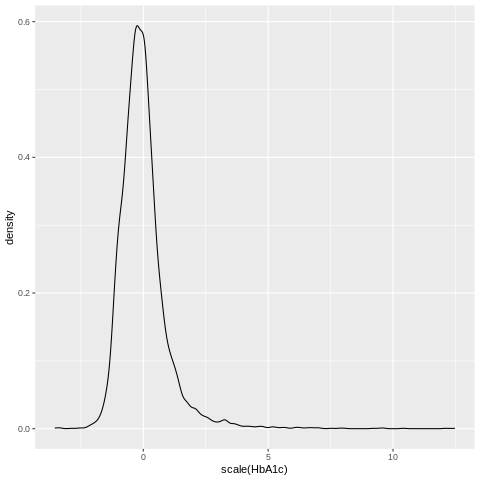

In [ ]:
%%R
lifedata%>%ggplot(aes(scale(HbA1c)))+geom_density()

## ASD mice

## Human Gut Microbiota from Autism Spectrum Disorder Promote Behavioral Symptoms in Mice

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6993574/

In [ ]:
%%R
asd<-read.csv("asd.csv")

In [ ]:
%%R
asd<-asd%>%filter(ASD_diagnosis!="Mild ASD")
asd$ASD_diagnosis<-factor(asd$ASD_diagnosis, levels=c("NT", "ASD"))

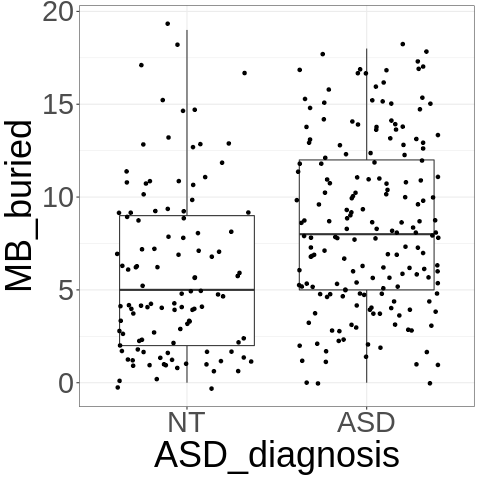

In [ ]:
%%R
asd%>%ggplot(aes(ASD_diagnosis, MB_buried))+geom_boxplot()+geom_jitter()+theme_bw()+theme(text = element_text(size = 36))

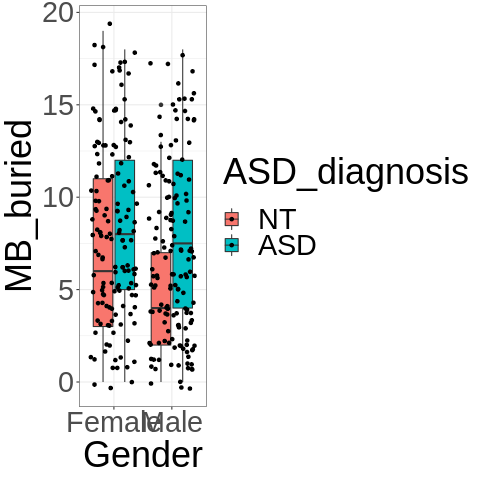

In [ ]:
%%R
asd%>%ggplot(aes(Gender, MB_buried, fill=ASD_diagnosis))+geom_boxplot()+geom_jitter()+theme_bw()+theme(text = element_text(size = 36))

In [ ]:
%%R
t.test(MB_buried~ASD_diagnosis, data=asd)


	Welch Two Sample t-test

data:  MB_buried by ASD_diagnosis
t = -4.7898, df = 235.94, p-value = 2.951e-06
alternative hypothesis: true difference in means between group NT and group ASD is not equal to 0
95 percent confidence interval:
 -3.722418 -1.552734
sample estimates:
 mean in group NT mean in group ASD 
         5.909910          8.547486 



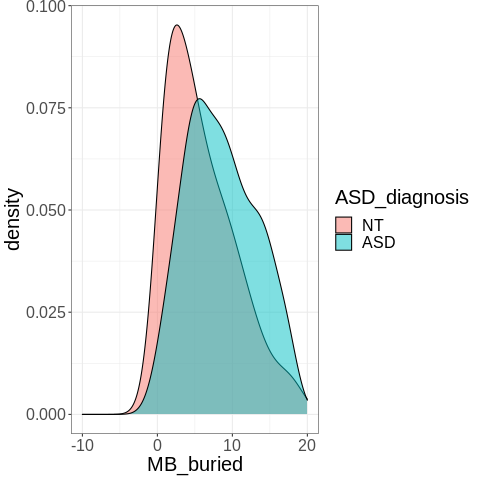

In [ ]:
%%R
asd%>%ggplot(aes(MB_buried,fill=ASD_diagnosis))+geom_density(alpha=0.5)+xlim(-10,20)+theme_bw()+theme(text = element_text(size = 20))

# Confidence internals

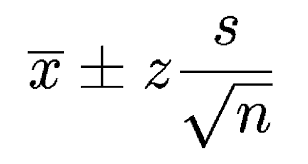

In [ ]:
%%R
1.96*(1.07/(sqrt(18)))

[1] 0.4943148


## T Test

$t\ =\ \cfrac{\overline{d}\ -\ 0}{\hat{\sigma}/\sqrt{n}}$


In [ ]:
%%R
itt_l<-itt_l%>%mutate(Group = case_when(Genotype=="-"~"Negative", Genotype=="+"~"Positive"))

In [ ]:
%%R
itt_l%>%group_by(Group)%>%get_summary_stats(Glucose)

# A tibble: 2 × 14
  Group    variable     n   min   max median    q1    q3   iqr   mad  mean    sd
  <chr>    <fct>    <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Negative Glucose     35   3.8  10.1   6.2    5    7.5   2.5   1.78  6.41  1.66
2 Positive Glucose     54   2.6  10     5.75   4.7  7.18  2.48  1.78  5.88  1.68
# … with 2 more variables: se <dbl>, ci <dbl>
# ℹ Use `colnames()` to see all variable names


In [ ]:
%%R
itt_l%>%t_test(Glucose~Group)

# A tibble: 1 × 8
  .y.     group1   group2      n1    n2 statistic    df     p
* <chr>   <chr>    <chr>    <int> <int>     <dbl> <dbl> <dbl>
1 Glucose Negative Positive    35    54      1.46  73.4 0.148


In [ ]:
%%R
itt_l$Group

 [1] "Positive" "Positive" "Positive" "Positive" "Positive" "Negative"
 [7] "Negative" "Negative" "Negative" "Negative" "Positive" "Positive"
[13] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[19] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[25] "Positive" "Negative" "Negative" "Negative" "Negative" "Negative"
[31] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[37] "Positive" "Positive" "Positive" "Positive" "Negative" "Negative"
[43] "Negative" "Negative" "Negative" "Negative" "Negative" "Negative"
[49] "Negative" "Negative" "Positive" "Positive" "Positive" "Positive"
[55] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[61] "Negative" "Negative" "Negative" "Negative" "Negative" "Positive"
[67] "Positive" "Positive" "Positive" "Positive" "Positive" "Positive"
[73] "Positive" "Positive" "Positive" "Negative" "Negative" "Negative"
[79] "Negative" "Negative" "Negative" "Negative" "Negative" "Negative"
[85] "

In [ ]:
%%R
g1<-c(1.32,
0.96,
0.78,
1.72,
1.47,
2.01,
2.31,
1.54)
g2<-c(3.25,
1.96,
1.74,
3,
2.57,
3.77,
2.64,
3.32)
gdata<-data.frame(g1,g2)



In [ ]:
%%R
gdata

    g1   g2
1 1.32 3.25
2 0.96 1.96
3 0.78 1.74
4 1.72 3.00
5 1.47 2.57
6 2.01 3.77
7 2.31 2.64
8 1.54 3.32


In [ ]:
%%R
t.test(g2,g1, var.equal = TRUE, data=gdata)


	Two Sample t-test

data:  g2 and g1
t = 4.1729, df = 14, p-value = 0.0009388
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6160281 1.9189719
sample estimates:
mean of x mean of y 
  2.78125   1.51375 



## T test on large dataset

In [ ]:
%%R
life_data2012<-lifedata%>%filter(`Year of data`=="2012")

In [ ]:
%%R
colnames(life_data2012)

 [1] "ID of participants"                     
 [2] "Sex"                                    
 [3] "Year of birth"                          
 [4] "Month of birth"                         
 [5] "Day of birth"                           
 [6] "Year of data"                           
 [7] "Time of data"                           
 [8] "Blood pressure_category"                
 [9] "Triglyceride-category"                  
[10] "HDL_category"                           
[11] "LDL_category"                           
[12] "GPT_category"                           
[13] "g-GTP_category"                         
[14] "HbA1c_category"                         
[15] "Age"                                    
[16] "Living area"                            
[17] "Height"                                 
[18] "Weight"                                 
[19] "Waist circumference (cm)"               
[20] "BMI"                                    
[21] "Fasting blood glucose"                  
[22] "HbA1c" 

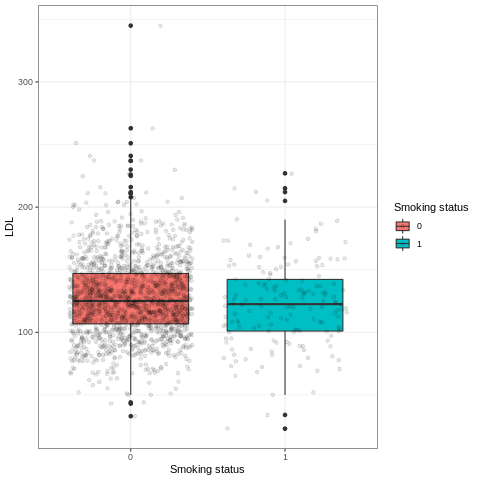

In [ ]:
%%R
life_data2012$`Smoking status`<-factor(life_data2012$`Smoking status`)
life_data2012%>%ggplot(aes(`Smoking status`,LDL, fill=`Smoking status`))+geom_boxplot()+geom_jitter(alpha=0.1)+theme_bw()

In [ ]:
%%R
life_data2012%>%t_test()

  argument "formula" is missing, with no default


 





Error in get_formula_left_hand_side(formula) : 
  argument "formula" is missing, with no default


RInterpreterError: ignored

# Multiple T Test example
data from https://www.nature.com/articles/s41467-022-34209-5

In [69]:
%%R
multi<-read_excel("multiT.xlsx")

In [72]:
%%R
multi

# A tibble: 3 × 6
  `Vec+Vec` `M3+Vec` `M3-CD+Vec` `M3+p300` `M3+CBP` `M3-CD+p300`
      <dbl>    <dbl>       <dbl>     <dbl>    <dbl>        <dbl>
1        13       39          15        13       25           13
2        10       45          19        20       30           21
3        20       35          12        10       24           13


In [77]:
%%R
multi_L<-multi%>%pivot_longer(cols=c(1:6), values_to="activity", names_to="group")

In [79]:
%%R
a<-aov(activity~group, data=multi_L)
summary(a)

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        5   1579  315.79   15.53 7.02e-05 ***
Residuals   12    244   20.33                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [80]:
%%R
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = activity ~ group, data = multi_L)

$group
                              diff         lwr         upr     p adj
M3-CD+Vec-M3-CD+p300 -3.333333e-01 -12.7001645  12.0334979 0.9999989
M3+CBP-M3-CD+p300     1.066667e+01  -1.7001645  23.0334979 0.1069626
M3+p300-M3-CD+p300   -1.333333e+00 -13.7001645  11.0334979 0.9989553
M3+Vec-M3-CD+p300     2.400000e+01  11.6331688  36.3668312 0.0003185
Vec+Vec-M3-CD+p300   -1.333333e+00 -13.7001645  11.0334979 0.9989553
M3+CBP-M3-CD+Vec      1.100000e+01  -1.3668312  23.3668312 0.0923877
M3+p300-M3-CD+Vec    -1.000000e+00 -13.3668312  11.3668312 0.9997409
M3+Vec-M3-CD+Vec      2.433333e+01  11.9665021  36.7001645 0.0002799
Vec+Vec-M3-CD+Vec    -1.000000e+00 -13.3668312  11.3668312 0.9997409
M3+p300-M3+CBP       -1.200000e+01 -24.3668312   0.3668312 0.0590529
M3+Vec-M3+CBP         1.333333e+01   0.9665021  25.7001645 0.0321459
Vec+Vec-M3+CBP       -1.200000e+01 

In [ ]:
!wget  "https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6plate.xls"

--2022-11-14 10:26:06--  https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6plate.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /toryn13/Rexamples/main/IL6plate.xls [following]
--2022-11-14 10:26:06--  https://raw.githubusercontent.com/toryn13/Rexamples/main/IL6plate.xls
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 28160 (28K) [application/octet-stream]
Saving to: ‘IL6plate.xls’

IL6plate.xls        100%[===================>]  27.50K  --.-KB/s    in 0.002s  

2022-11-14 10:26:06 (12.3 MB/s) - ‘IL6plate.xls’ saved [28160/28160]



In [ ]:
%%R
library(readxl)

In [ ]:

%%R
standards<-read_excel("IL6plate.xls", range = "A14:D22")
colnames(standards)<-c("cell", "Conc", "rep1", "rep2")

New names:
• `` -> `...1`
• `` -> `...4`


In [ ]:
%%R
standardsL<-pivot_longer(standards, starts_with("rep"), names_to = "replicate", values_to = "Abs")

In [ ]:
%%R
standardsL

# A tibble: 16 × 4
   cell    Conc replicate   Abs
   <chr>  <dbl> <chr>     <dbl>
 1 A       0    rep1      0.054
 2 A       0    rep2      0.052
 3 B       7.81 rep1      0.134
 4 B       7.81 rep2      0.126
 5 C      15.6  rep1      0.183
 6 C      15.6  rep2      0.187
 7 D      31.2  rep1      0.307
 8 D      31.2  rep2      0.31 
 9 E      62.5  rep1      0.548
10 E      62.5  rep2      0.553
11 F     125    rep1      0.953
12 F     125    rep2      0.949
13 G     250    rep1      1.68 
14 G     250    rep2      1.65 
15 H     500    rep1      2.59 
16 H     500    rep2      2.54 


## Using GGPLOT2

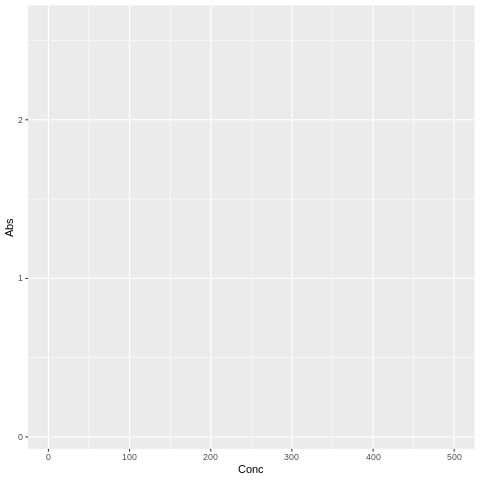

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))

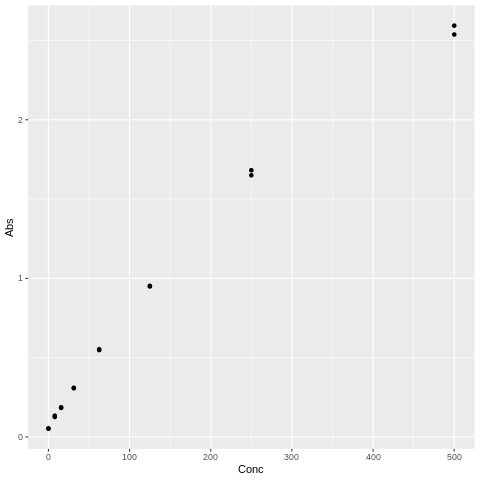

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))+geom_point()

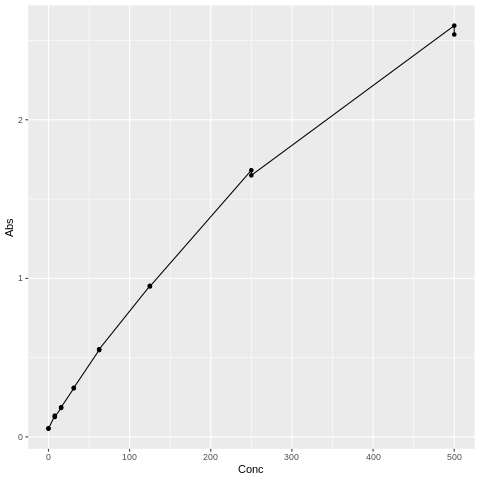

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_line()

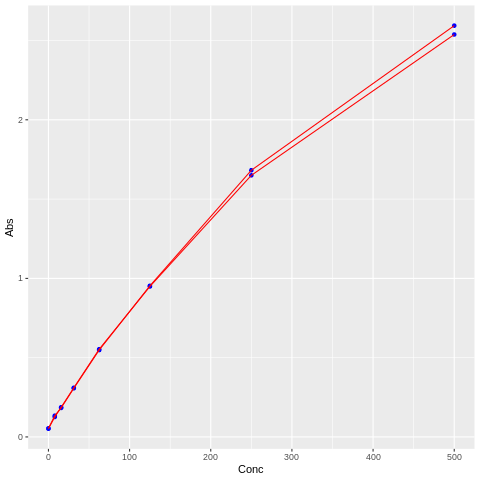

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, group=replicate))+geom_point(colour="blue")+geom_line(colour="red")

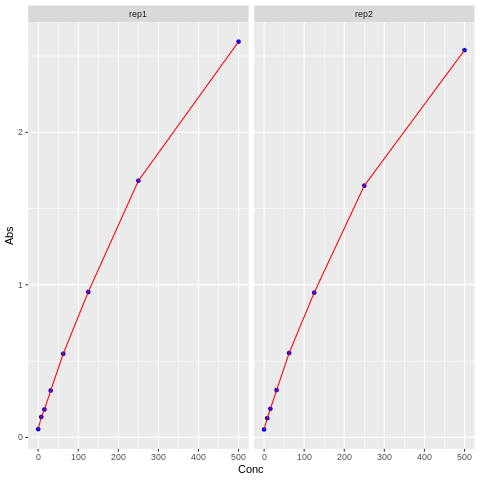

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, group=replicate))+geom_point(colour="blue")+geom_line(colour="red")+facet_grid(.~replicate)

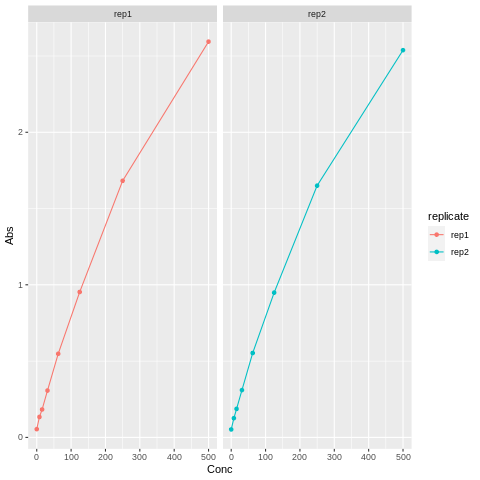

In [ ]:
%%R
standardsL%>%ggplot(aes(Conc,Abs, color=replicate))+geom_point()+geom_line()+facet_grid(.~replicate)

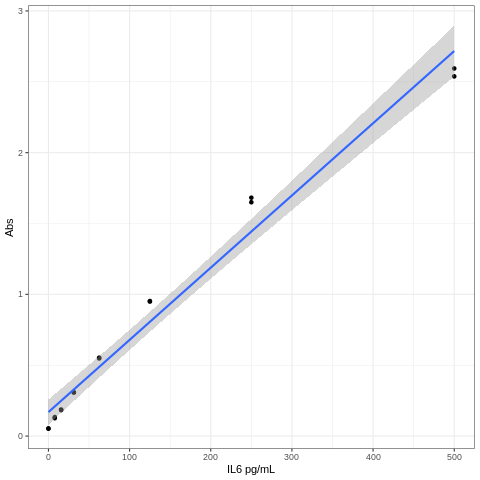

In [ ]:
%%R
curve<-standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_smooth(method="lm")+theme_bw()+xlab(c("IL6 pg/mL"))
curve

##Regression

In [ ]:
%%R
library(tidyverse)

In [ ]:
%%R
lifedata<-read_csv("lifestyledata.csv")

Rows: 6156 Columns: 67
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ID of participants
dbl (66): Sex, Year of birth, Month of birth, Day of birth, Year of data, Ti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
colnames(lifedata)

 [1] "ID of participants"                     
 [2] "Sex"                                    
 [3] "Year of birth"                          
 [4] "Month of birth"                         
 [5] "Day of birth"                           
 [6] "Year of data"                           
 [7] "Time of data"                           
 [8] "Blood pressure_category"                
 [9] "Triglyceride-category"                  
[10] "HDL_category"                           
[11] "LDL_category"                           
[12] "GPT_category"                           
[13] "g-GTP_category"                         
[14] "HbA1c_category"                         
[15] "Age"                                    
[16] "Living area"                            
[17] "Height"                                 
[18] "Weight"                                 
[19] "Waist circumference (cm)"               
[20] "BMI"                                    
[21] "Fasting blood glucose"                  
[22] "HbA1c" 

In [ ]:
%%R
lifedata2012<-lifedata%>%filter(`Year of data`==2012)

In [ ]:
%%R
reg<-lm(lifedata2012$`HbA1c`~lifedata2012$HDL)
summary(reg)


Call:
lm(formula = lifedata2012$HbA1c ~ lifedata2012$HDL)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6384 -0.2986 -0.0893  0.1778  6.3778 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.5526438  0.0500144 111.021  < 2e-16 ***
lifedata2012$HDL -0.0041893  0.0007826  -5.353 9.87e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.518 on 1670 degrees of freedom
Multiple R-squared:  0.01687,	Adjusted R-squared:  0.01628 
F-statistic: 28.65 on 1 and 1670 DF,  p-value: 9.865e-08



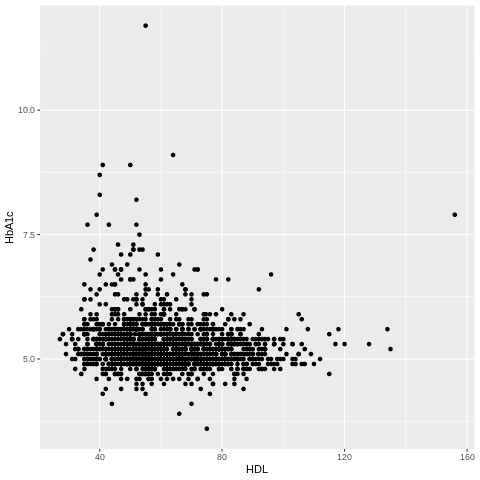

In [ ]:
%%R
lifedata2012%>%ggplot(aes(HDL, HbA1c))+geom_point()

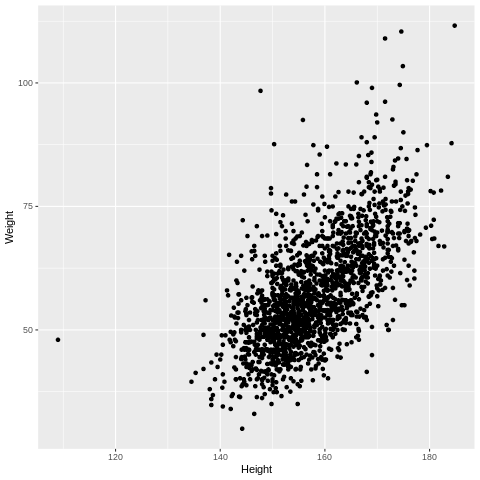

In [ ]:
%%R
lifedata2012%>%ggplot(aes(Height, Weight))+geom_point()

In [ ]:
%%R
reg<-lm(lifedata2012$Height~lifedata2012$Weight)
summary(reg)


Call:
lm(formula = lifedata2012$Height ~ lifedata2012$Weight)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.156  -4.349   0.038   4.434  20.243 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         129.28212    0.88325  146.37   <2e-16 ***
lifedata2012$Weight   0.49738    0.01509   32.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.773 on 1670 degrees of freedom
Multiple R-squared:  0.3941,	Adjusted R-squared:  0.3938 
F-statistic:  1086 on 1 and 1670 DF,  p-value: < 2.2e-16

